# Lorenz Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1th simulation time: 0.035s
1th simulation plot time: 0.651s
1th simulation save time: 0.234s
2th simulation time: 0.033s
2th simulation plot time: 0.690s
2th simulation save time: 0.216s
3th simulation time: 0.035s
3th simulation plot time: 0.692s
3th simulation save time: 0.248s
4th simulation time: 0.033s
4th simulation plot time: 0.673s
4th simulation save time: 0.211s
5th simulation time: 0.028s
5th simulation plot time: 0.619s
5th simulation save time: 0.131s


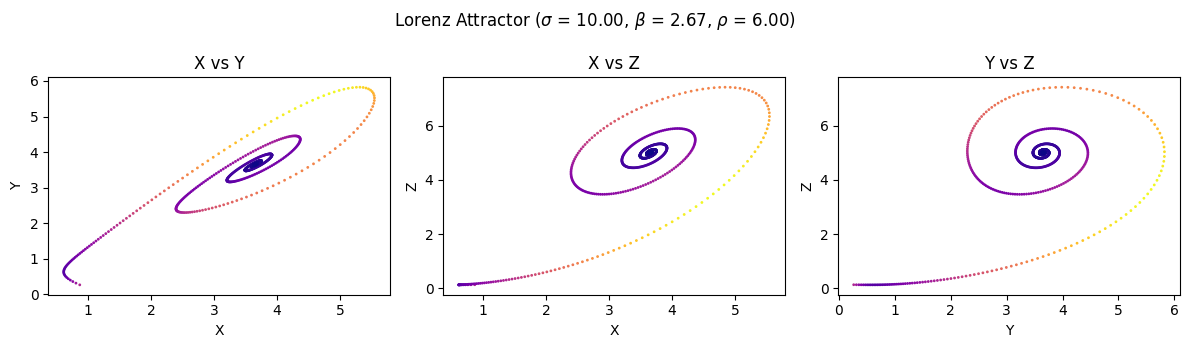

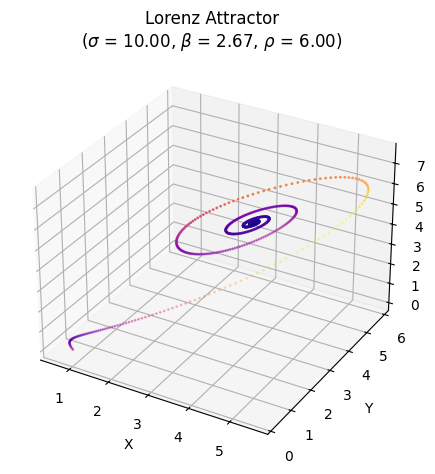

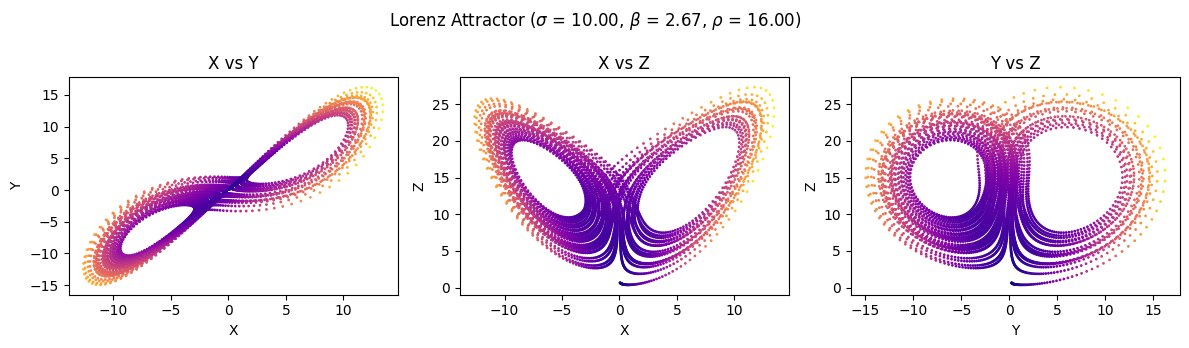

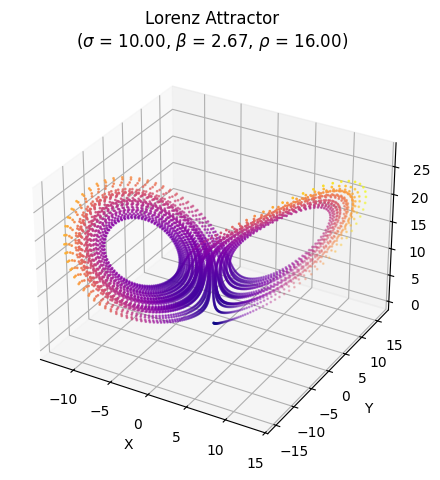

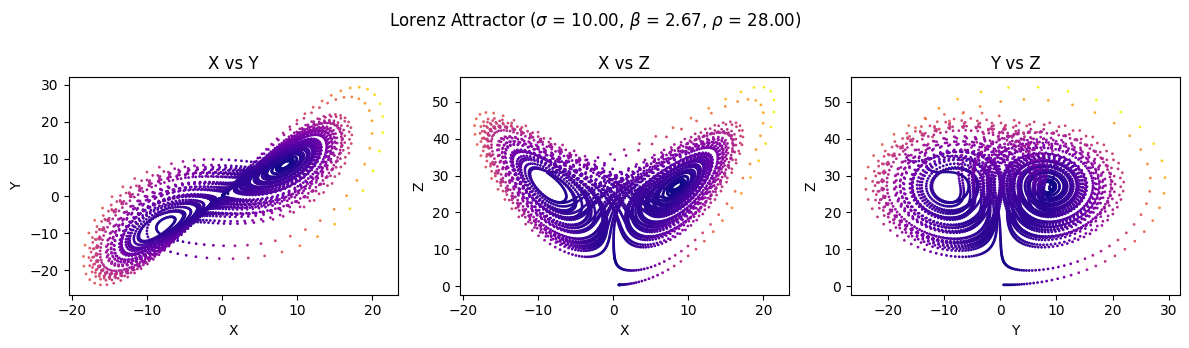

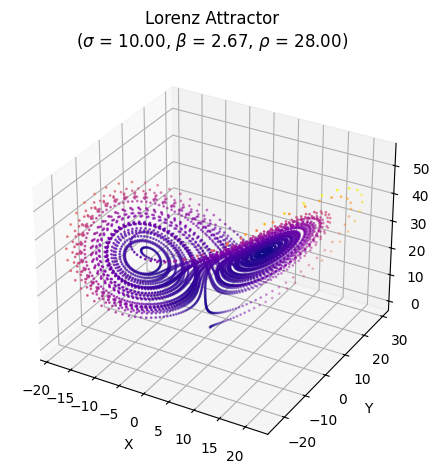

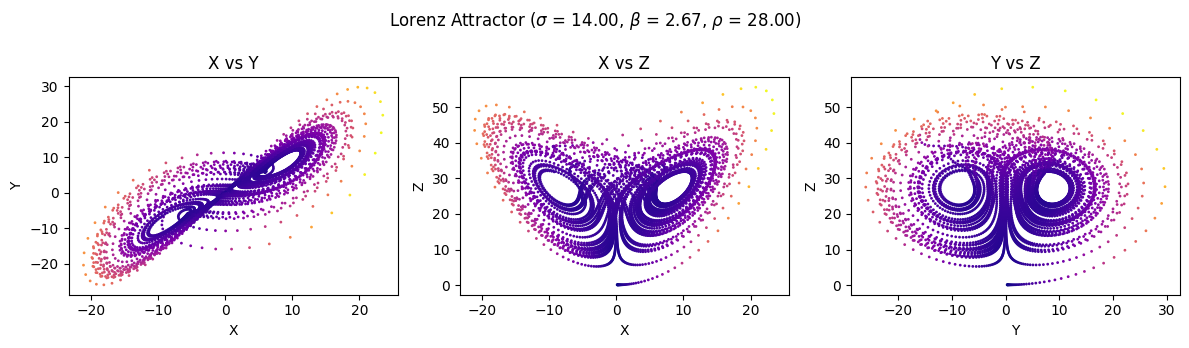

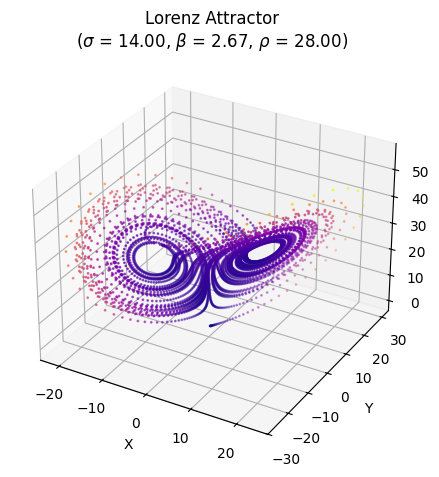

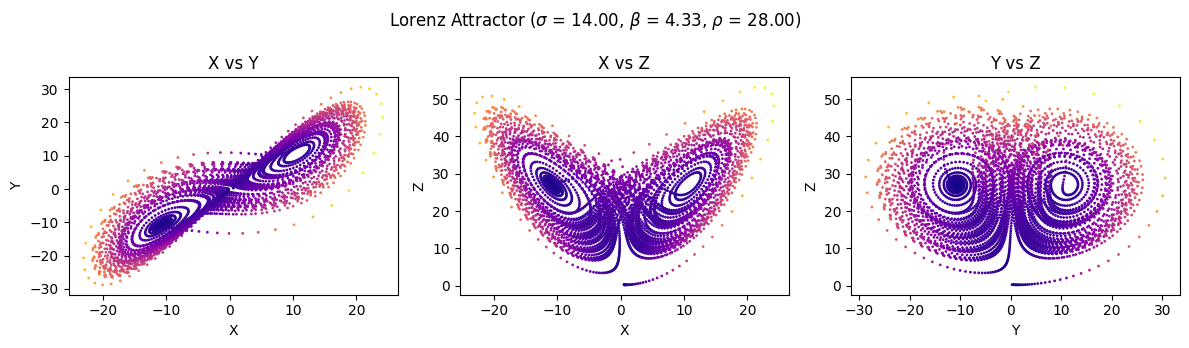

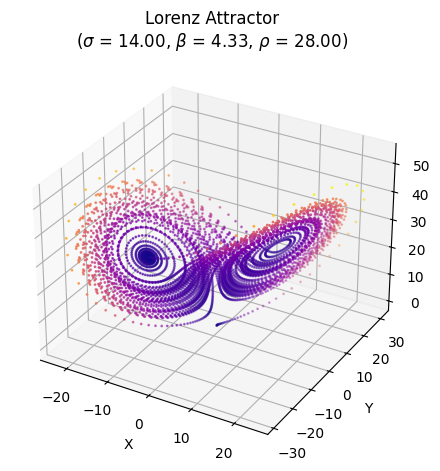

In [4]:
import time
from diff import euler
import os

os.makedirs("./res/csv", exist_ok=True)
os.makedirs("./res/fig", exist_ok=True)

# tuple of (sigma, beta, rho)
params = [
    (10, 8/3, 6),
    (10, 8/3, 16),
    (10, 8/3, 28),
    (14, 8/3, 28),
    (14, 13/3, 28),
]

np.random.seed(128)
cmap = "plasma"
# plt.style.use("./plt.mplstyle")
hyper = pd.DataFrame(columns=['sigma', 'beta', 'rho', 'x0', 'y0', 'z0', 'dt', 'n'])

for i, (sigma, beta, rho) in enumerate(params):
    x0, y0, z0 = np.random.rand(3)
    dt = 0.01
    n = 5000

    start = time.perf_counter()
    X, Y, Z, G = euler(x0, y0, z0, sigma, rho, beta, dt, n)
    print(f"{i+1}th simulation time: {time.perf_counter() - start:.3f}s")

    start = time.perf_counter()
    fig, axs = plt.subplots(1, 3, figsize=(12, 3.5))
    for j, (a, b, la, lb) in enumerate(((X, Y, 'X', 'Y'), (X, Z, 'X', 'Z'), (Y, Z, 'Y', 'Z'))):
        ax = axs[j]
        # ax.plot(a, b)
        ax.scatter(a, b, c=G, cmap=cmap, s=1)
        ax.set_xlabel(la)
        ax.set_ylabel(lb)
        ax.set_title(f'{la} vs {lb}')

    fig.suptitle(
        f"Lorenz Attractor ($\\sigma$ = {sigma:.2f}, $\\beta$ = {beta:.2f}, $\\rho$ = {rho:.2f})"
    )
    fig.show()
    fig.tight_layout()
    fig.savefig(f"res/fig/lorenz_{i}_pairs.png")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.plot(X, Y, Z)
    ax.scatter(X, Y, Z, c=G, cmap=cmap, s=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(
        f"Lorenz Attractor\n($\\sigma$ = {sigma:.2f}, $\\beta$ = {beta:.2f}, $\\rho$ = {rho:.2f})"
    )
    fig.tight_layout()
    fig.show()
    print(f"{i+1}th simulation plot time: {time.perf_counter() - start:.3f}s")
    start = time.perf_counter()
    fig.savefig(f'res/fig/lorenz_{i}_3d.png')

    hyper.loc[i] = [sigma, beta, rho, x0, y0, z0, dt, n]
    df = pd.DataFrame({
        'X': X,
        'Y': Y,
        'Z': Z
    })
    df.to_csv(f"res/csv/lorenz_{i}.csv", index=False)
    print(f"{i+1}th simulation save time: {time.perf_counter() - start:.3f}s")

hyper.to_csv("res/csv/hyper.csv", index=False)